In [1]:

import numpy as np
import pickle
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features






In [4]:
#!/usr/bin/env python
"""
convert dos linefeeds (crlf) to unix (lf)
usage: dos2unix.py 
"""
original = "C:\\Users\\NGSi\\ud120\\final_project\\final_project_dataset_modified.pkl"
destination = "C:\\Users\\NGSi\\ud120\\final_project\\final_project_dataset_modified_unix.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

print("Done. Saved %s bytes." % (len(content)-outsize))

Done. Saved 6564 bytes.


Coeff:  [1.97017287]
Intercept:  662220.4176015807
Score:  0.04164573226747781
Score:  -0.04471207836147806
*********** Switch **********
Coeff:  [2.36761212]
Intercept:  229541.90407383675
Score:  -0.015971672645719526
Score:  0.059756351804596486


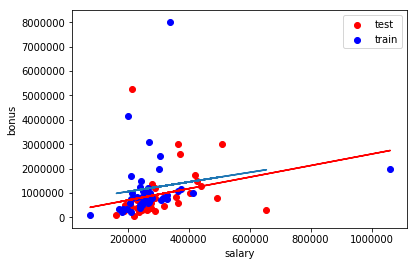

In [8]:
import sys
import pickle
sys.path.append("../tools/")

dictionary = pickle.load(open("C:\\Users\\NGSi\\ud120\\final_project\\final_project_dataset_modified_unix.pkl", "rb"))
     
### list the features you want to look at--first item in the
### list will be the "target" feature

features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### your regression goes here!
### please name it reg, so that the plotting code below picks it up and
### plots it correctly

from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(feature_train, target_train)
print("Coeff: ", reg.coef_) 
print("Intercept: ", reg.intercept_) 
print("Score: ", reg.score(feature_train, target_train))
print("Score: ", reg.score(feature_test, target_test))
pred = reg.predict(feature_test)


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
# added
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="r")
print("*********** Switch **********")
print("Coeff: ", reg.coef_)
print("Intercept: ", reg.intercept_)
print("Score: ", reg.score(feature_train, target_train))
print("Score: ", reg.score(feature_test, target_test))
#

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()
%matplotlib inline 
